In [2]:
import numpy as np
import os, cv2
import re, random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


In [3]:
data = np.load('../X_y_clean.npz')
X = data['X']
y = data['y']


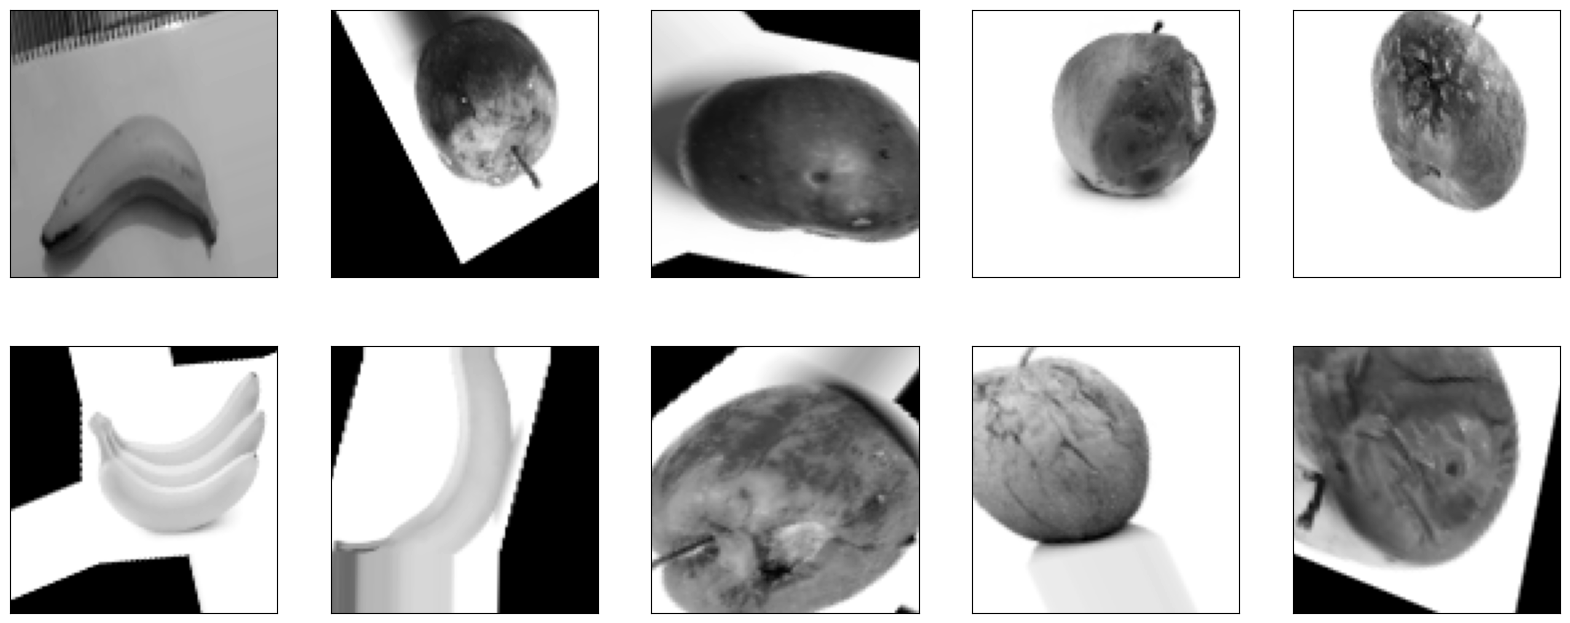

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7, 1.4],
    horizontal_flip=True,
    vertical_flip=True
)


datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen, etiqueta in datagen.flow(X, y, batch_size=10, shuffle=False):
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i].reshape(100, 100), cmap="gray")
  break

In [5]:
train_size = int(len(X) * 0.80)

X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 6262
Test set size: 1106


In [ ]:
"""np.savez('../train_test_data.npz', 
         X_train=X_train, 
         X_test=X_test, 
         y_train=y_train, 
         y_test=y_test)
"""

"""data = np.load('data/train_test_data.npz')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']"""

In [6]:
modelCNN_DA = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 100, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

In [7]:
modelCNN_DA.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [8]:
data_gen_trainning = datagen.flow(X_train, y_train, batch_size=32)

In [12]:
type(data_gen_trainning)

keras.src.preprocessing.image.NumpyArrayIterator

In [10]:
from tensorflow.keras.callbacks import TensorBoard

In [11]:
TensorBoardCNN_DA = TensorBoard(log_dir='logs/CNN_DA', histogram_freq=1)
modelCNN_DA.fit(data_gen_trainning, batch_size= 32, epochs=100,
              validation_data = (X_test, y_test),
              steps_per_epoch =int(np.ceil(len(X_train)/float(32))),
              validation_steps =int(np.ceil(len(X_test)/float(32))),
              callbacks=[TensorBoardCNN_DA])

Epoch 1/100
196/196 [==============================] - 63s 311ms/step - loss: 1.0899 - accuracy: 0.3919 - val_loss: 1.0854 - val_accuracy: 0.4241
Epoch 2/100
196/196 [==============================] - 63s 323ms/step - loss: 1.0878 - accuracy: 0.3930 - val_loss: 1.0832 - val_accuracy: 0.4241
Epoch 3/100
196/196 [==============================] - 60s 306ms/step - loss: 1.0879 - accuracy: 0.3930 - val_loss: 1.0830 - val_accuracy: 0.4241
Epoch 4/100
196/196 [==============================] - 60s 304ms/step - loss: 1.0878 - accuracy: 0.3930 - val_loss: 1.0827 - val_accuracy: 0.4241
Epoch 5/100
196/196 [==============================] - 60s 304ms/step - loss: 1.0878 - accuracy: 0.3930 - val_loss: 1.0840 - val_accuracy: 0.4241
Epoch 6/100
196/196 [==============================] - 60s 304ms/step - loss: 1.0881 - accuracy: 0.3930 - val_loss: 1.0831 - val_accuracy: 0.4241
Epoch 7/100
196/196 [==============================] - 62s 317ms/step - loss: 1.0879 - accuracy: 0.3930 - val_loss: 1.0830 -

KeyboardInterrupt: 